# Proof that LSTM works better than GRU & RNN on Long Sequences by `Mr. Harshit Dawar!`

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Input, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def returnLabels(x, index1, index2, index3):
    # x is the sequence in this fucntion
    
    # Specifying the conditions below to categorise the points into 2 categories.
    if x[index1] < 0 and x[index2] < 0 and x[index3] < 0:
        return 1
    elif x[index1] < 0 and x[index2] > 0 and x[index3] > 0:
        return 1
    elif x[index1] > 0 and x[index2] > 0 and x[index3] < 0:
        return 1
    elif x[index1] > 0 and x[index2] < 0 and x[index3] > 0:
        return 1
    else:
        return 0

## Generating Shorter Sequences which are easy to remember

In [6]:
Sequence_Length = 9
data = []
labels = []

for i in range(5000):
    temp = np.random.randn(Sequence_Length)
    data.append(temp)
    
    # Using the Last 3 elements of the sequence for the category prediction which is easy!
    labels.append(returnLabels(temp, -1, -2, -3))
    
data, labels = np.array(data), np.array(labels)

## Building a AR Model with sigmoid activation function because it is classification problem & have only classes, & also sigmoid ranges from 0 to 1.

In [9]:
inputShape = Input(shape = (Sequence_Length, ))
LayerStack = Dense(1, activation = "sigmoid")(inputShape)

ARModel = Model(inputShape, LayerStack)
ARModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
ARModel.summary()

trainedModel = ARModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 0s 3ms/step - loss: 0.8907 - accuracy: 0.4776 - val_loss: 0.8733 - val_accuracy: 0.4808
Epoch 2/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8574 - accuracy: 0.4740 - val_loss: 0.8415 - val_accuracy: 0.4800
Epoch 3/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8271 - accuracy: 0.4768 - val_loss: 0.8129 - val_accuracy: 0.4832
Epoch 4/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8006 - accuracy: 0.478

79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5120 - val_loss: 0.6938 - val_accuracy: 0.4976
Epoch 55/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5144 - val_loss: 0.6939 - val_accuracy: 0.4940
Epoch 56/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5124 - val_loss: 0.6940 - val_accuracy: 0.4924
Epoch 57/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5048 - val_loss: 0.6941 - val_accuracy: 0.4900
Epoch 58/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5148 - val_loss: 0.6940 - val_accuracy: 0.4988
Epoch 59/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5080 - val_loss: 0.6941 - val_accuracy: 0.4960
Epoch 60/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5112 - val_loss: 0.6941 - val_accuracy: 0.4908
Epoch 61/300
79/79 

Epoch 112/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5048 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 113/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5080 - val_loss: 0.6941 - val_accuracy: 0.4940
Epoch 114/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5016 - val_loss: 0.6942 - val_accuracy: 0.4960
Epoch 115/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5108 - val_loss: 0.6942 - val_accuracy: 0.5028
Epoch 116/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5116 - val_loss: 0.6942 - val_accuracy: 0.5012
Epoch 117/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6940 - val_accuracy: 0.4992
Epoch 118/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6940 - val_accuracy: 0.4952

79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5152 - val_loss: 0.6939 - val_accuracy: 0.4928
Epoch 170/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5152 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 171/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5112 - val_loss: 0.6941 - val_accuracy: 0.4992
Epoch 172/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5144 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 173/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5124 - val_loss: 0.6942 - val_accuracy: 0.4912
Epoch 174/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5128 - val_loss: 0.6943 - val_accuracy: 0.4964
Epoch 175/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5028 - val_loss: 0.6942 - val_accuracy: 0.4996
Epoch 176/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5120 - val_loss: 0.6940 - val_accuracy: 0.4904
Epoch 227/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6941 - val_accuracy: 0.4964
Epoch 228/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5104 - val_loss: 0.6942 - val_accuracy: 0.4916
Epoch 229/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5068 - val_loss: 0.6941 - val_accuracy: 0.4944
Epoch 230/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5036 - val_loss: 0.6940 - val_accuracy: 0.4992
Epoch 231/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5116 - val_loss: 0.6940 - val_accuracy: 0.4952
Epoch 232/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5120 - val_loss: 0.6941 - val_accuracy: 0.4968
Epoch 233/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5072 - val_loss: 0.6939 - val_accuracy: 0.4976
Epoch 284/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5104 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 285/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5096 - val_loss: 0.6937 - val_accuracy: 0.4964
Epoch 286/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6940 - val_accuracy: 0.4976
Epoch 287/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5076 - val_loss: 0.6941 - val_accuracy: 0.4936
Epoch 288/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5044 - val_loss: 0.6941 - val_accuracy: 0.4908
Epoch 289/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4984 - val_loss: 0.6941 - val_accuracy: 0.4948
Epoch 290/300

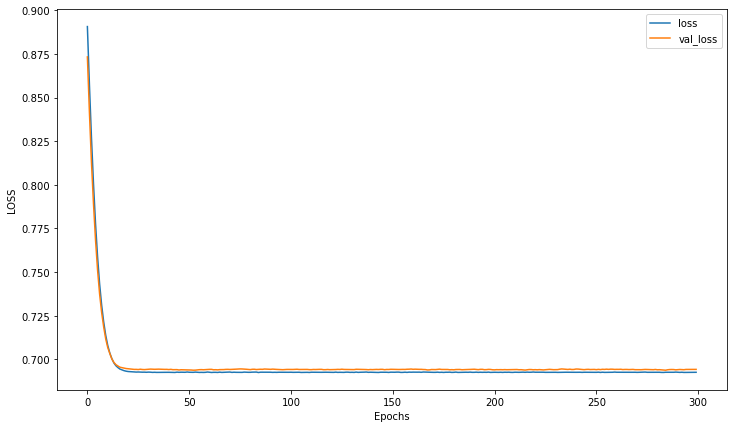

In [12]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

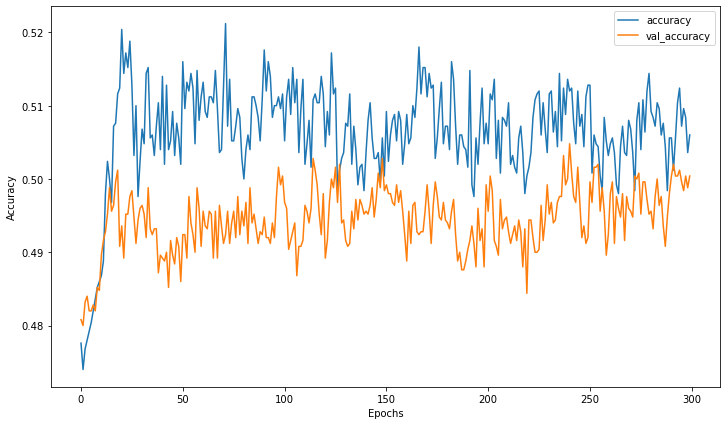

In [16]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***It is been seen that how poor the accuracy of the Simple Model is!***

## Generating SimpleRNN

In [20]:
# Resizing the Dataset to 3D for the RNN, LSTM, & GRU Working
data = data.reshape(-1, Sequence_Length, 1)    # Equivalent to data = np.expand_dims(data, -1)
data.shape

(5000, 9, 1)

In [22]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = SimpleRNN(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

RNNModel = Model(inputShape, LayerStack)
RNNModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
RNNModel.summary()

trainedModel = RNNModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 1s 8ms/step - loss: 0.7320 - accuracy: 0.5512 - val_loss: 0.7005 - val_accuracy: 0.5672
Epoch 2/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6907 - accuracy: 0.5688 - val_loss: 0.6815 - val_accuracy: 0.5672
Epoch 3/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6776 - accuracy: 0.5804 - val

79/79 [==============================] - 1s 7ms/step - loss: 0.1532 - accuracy: 0.9700 - val_loss: 0.1472 - val_accuracy: 0.9728
Epoch 54/300
79/79 [==============================] - 0s 6ms/step - loss: 0.1499 - accuracy: 0.9720 - val_loss: 0.1449 - val_accuracy: 0.9712
Epoch 55/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1472 - accuracy: 0.9720 - val_loss: 0.1423 - val_accuracy: 0.9716
Epoch 56/300
79/79 [==============================] - 0s 5ms/step - loss: 0.1448 - accuracy: 0.9720 - val_loss: 0.1405 - val_accuracy: 0.9712
Epoch 57/300
79/79 [==============================] - 0s 5ms/step - loss: 0.1422 - accuracy: 0.9752 - val_loss: 0.1381 - val_accuracy: 0.9740
Epoch 58/300
79/79 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9740 - val_loss: 0.1359 - val_accuracy: 0.9720
Epoch 59/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.9748 - val_loss: 0.1339 - val_accuracy: 0.9740
Epoch 60/300
79/79 

Epoch 111/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9864 - val_loss: 0.0764 - val_accuracy: 0.9840
Epoch 112/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0757 - accuracy: 0.9852 - val_loss: 0.0768 - val_accuracy: 0.9828
Epoch 113/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9868 - val_loss: 0.0757 - val_accuracy: 0.9836
Epoch 114/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0746 - accuracy: 0.9848 - val_loss: 0.0755 - val_accuracy: 0.9808
Epoch 115/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9872 - val_loss: 0.0749 - val_accuracy: 0.9840
Epoch 116/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9880 - val_loss: 0.0736 - val_accuracy: 0.9852
Epoch 117/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0727 - accuracy: 0.9844 - val_loss: 0.0747 - val_accuracy: 0.9820

79/79 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9900 - val_loss: 0.0574 - val_accuracy: 0.9864
Epoch 169/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9904 - val_loss: 0.0569 - val_accuracy: 0.9836
Epoch 170/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9920 - val_loss: 0.0555 - val_accuracy: 0.9876
Epoch 171/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0518 - accuracy: 0.9908 - val_loss: 0.0556 - val_accuracy: 0.9872
Epoch 172/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0511 - accuracy: 0.9908 - val_loss: 0.0558 - val_accuracy: 0.9872
Epoch 173/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9896 - val_loss: 0.0570 - val_accuracy: 0.9836
Epoch 174/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0511 - accuracy: 0.9892 - val_loss: 0.0554 - val_accuracy: 0.9876
Epoch 175/300

79/79 [==============================] - 0s 5ms/step - loss: 0.0408 - accuracy: 0.9932 - val_loss: 0.0462 - val_accuracy: 0.9892
Epoch 226/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0407 - accuracy: 0.9932 - val_loss: 0.0466 - val_accuracy: 0.9888
Epoch 227/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9932 - val_loss: 0.0486 - val_accuracy: 0.9888
Epoch 228/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.9924 - val_loss: 0.0468 - val_accuracy: 0.9884
Epoch 229/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9936 - val_loss: 0.0479 - val_accuracy: 0.9864
Epoch 230/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0403 - accuracy: 0.9932 - val_loss: 0.0477 - val_accuracy: 0.9880
Epoch 231/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9908 - val_loss: 0.0468 - val_accuracy: 0.9896
Epoch 232/300

79/79 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9932 - val_loss: 0.0433 - val_accuracy: 0.9884
Epoch 283/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9928 - val_loss: 0.0432 - val_accuracy: 0.9884
Epoch 284/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9944 - val_loss: 0.0405 - val_accuracy: 0.9876
Epoch 285/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9944 - val_loss: 0.0435 - val_accuracy: 0.9888
Epoch 286/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9936 - val_loss: 0.0401 - val_accuracy: 0.9884
Epoch 287/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9936 - val_loss: 0.0410 - val_accuracy: 0.9880
Epoch 288/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9932 - val_loss: 0.0399 - val_accuracy: 0.9880
Epoch 289/300

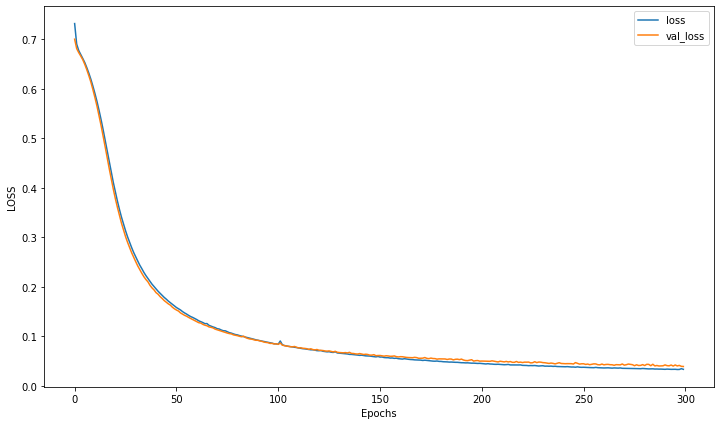

In [23]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

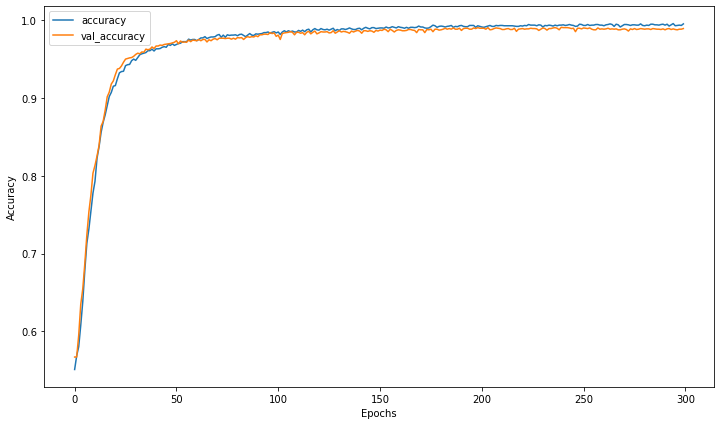

In [24]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating GRU

In [25]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = GRU(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

GRUModel = Model(inputShape, LayerStack)
GRUModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
GRUModel.summary()

trainedModel = GRUModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
gru (GRU)                    (None, 10)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 1s 13ms/step - loss: 0.6983 - accuracy: 0.5596 - val_loss: 0.6976 - val_accuracy: 0.5376
Epoch 2/300
79/79 [==============================] - 1s 8ms/step - loss: 0.6943 - accuracy: 0.5500 - val_loss: 0.6953 - val_accuracy: 0.5196
Epoch 3/300
79/79 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.5288 - v

79/79 [==============================] - 1s 7ms/step - loss: 0.1641 - accuracy: 0.9532 - val_loss: 0.1756 - val_accuracy: 0.9444
Epoch 54/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1589 - accuracy: 0.9552 - val_loss: 0.1720 - val_accuracy: 0.9468
Epoch 55/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1553 - accuracy: 0.9568 - val_loss: 0.1672 - val_accuracy: 0.9484
Epoch 56/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1501 - accuracy: 0.9576 - val_loss: 0.1627 - val_accuracy: 0.9488
Epoch 57/300
79/79 [==============================] - 1s 8ms/step - loss: 0.1456 - accuracy: 0.9612 - val_loss: 0.1585 - val_accuracy: 0.9492
Epoch 58/300
79/79 [==============================] - 1s 8ms/step - loss: 0.1417 - accuracy: 0.9596 - val_loss: 0.1542 - val_accuracy: 0.9520
Epoch 59/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1375 - accuracy: 0.9632 - val_loss: 0.1507 - val_accuracy: 0.9548
Epoch 60/300
79/79 

Epoch 111/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0438 - accuracy: 0.9912 - val_loss: 0.0631 - val_accuracy: 0.9792
Epoch 112/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0429 - accuracy: 0.9924 - val_loss: 0.0629 - val_accuracy: 0.9792
Epoch 113/300
79/79 [==============================] - 1s 8ms/step - loss: 0.0423 - accuracy: 0.9924 - val_loss: 0.0624 - val_accuracy: 0.9796
Epoch 114/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0415 - accuracy: 0.9912 - val_loss: 0.0618 - val_accuracy: 0.9808
Epoch 115/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0406 - accuracy: 0.9928 - val_loss: 0.0613 - val_accuracy: 0.9804
Epoch 116/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0401 - accuracy: 0.9916 - val_loss: 0.0607 - val_accuracy: 0.9808
Epoch 117/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0392 - accuracy: 0.9928 - val_loss: 0.0603 - val_accuracy: 0.9800

79/79 [==============================] - 1s 10ms/step - loss: 0.0168 - accuracy: 0.9968 - val_loss: 0.0449 - val_accuracy: 0.9836
Epoch 169/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0170 - accuracy: 0.9968 - val_loss: 0.0439 - val_accuracy: 0.9844
Epoch 170/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0164 - accuracy: 0.9972 - val_loss: 0.0439 - val_accuracy: 0.9836
Epoch 171/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0164 - accuracy: 0.9976 - val_loss: 0.0437 - val_accuracy: 0.9840
Epoch 172/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0160 - accuracy: 0.9972 - val_loss: 0.0437 - val_accuracy: 0.9844
Epoch 173/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0161 - accuracy: 0.9972 - val_loss: 0.0434 - val_accuracy: 0.9840
Epoch 174/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 0.0433 - val_accuracy: 0.9836
Epoch 175/30

79/79 [==============================] - 1s 8ms/step - loss: 0.0075 - accuracy: 0.9996 - val_loss: 0.0371 - val_accuracy: 0.9856
Epoch 226/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.0372 - val_accuracy: 0.9852
Epoch 227/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.0365 - val_accuracy: 0.9868
Epoch 228/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0073 - accuracy: 0.9996 - val_loss: 0.0366 - val_accuracy: 0.9860
Epoch 229/300
79/79 [==============================] - 1s 8ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.0369 - val_accuracy: 0.9864
Epoch 230/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9868
Epoch 231/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0070 - accuracy: 0.9996 - val_loss: 0.0373 - val_accuracy: 0.9860
Epoch 232/300

79/79 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9892
Epoch 283/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9892
Epoch 284/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 285/300
79/79 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 286/300
79/79 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9884
Epoch 287/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 0.9884
Epoch 288/300
79/79 [==============================] - 1s 12ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9884
Epoch 289/3

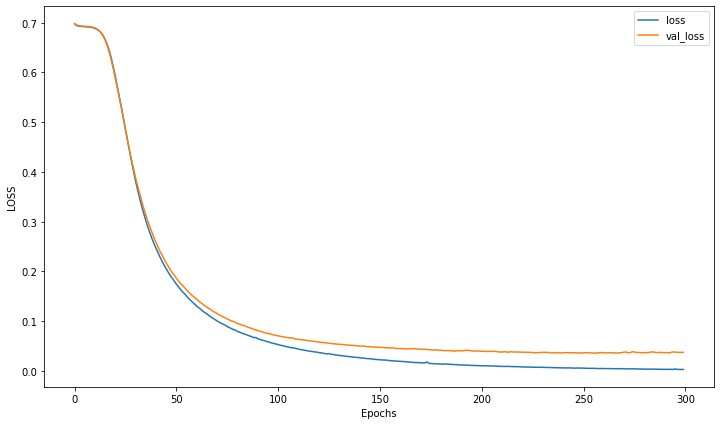

In [26]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

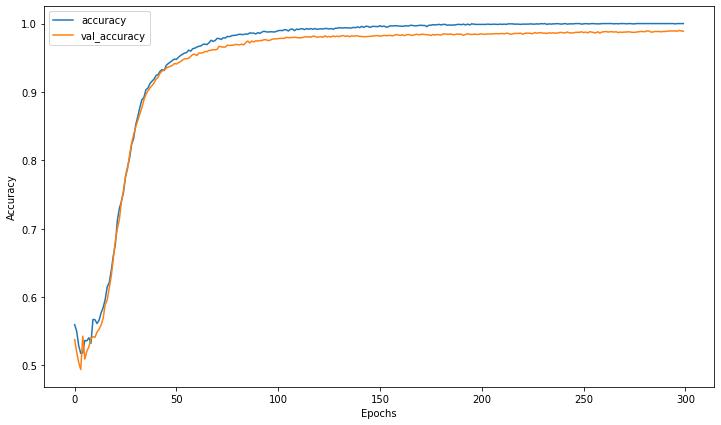

In [27]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating LSTM

In [28]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = LSTM(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
LSTMModel.summary()

trainedModel = LSTMModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 1s 15ms/step - loss: 0.6949 - accuracy: 0.5412 - val_loss: 0.6948 - val_accuracy: 0.5296
Epoch 2/300
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.5372 - val_loss: 0.6942 - val_accuracy: 0.5104
Epoch 3/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5292 - v

79/79 [==============================] - 1s 6ms/step - loss: 0.1142 - accuracy: 0.9720 - val_loss: 0.1166 - val_accuracy: 0.9672
Epoch 54/300
79/79 [==============================] - 1s 8ms/step - loss: 0.1102 - accuracy: 0.9756 - val_loss: 0.1127 - val_accuracy: 0.9672
Epoch 55/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1066 - accuracy: 0.9760 - val_loss: 0.1100 - val_accuracy: 0.9668
Epoch 56/300
79/79 [==============================] - 1s 6ms/step - loss: 0.1031 - accuracy: 0.9780 - val_loss: 0.1066 - val_accuracy: 0.9680
Epoch 57/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0998 - accuracy: 0.9772 - val_loss: 0.1045 - val_accuracy: 0.9668
Epoch 58/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0971 - accuracy: 0.9788 - val_loss: 0.1019 - val_accuracy: 0.9664
Epoch 59/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0944 - accuracy: 0.9788 - val_loss: 0.0991 - val_accuracy: 0.9692
Epoch 60/300
79/79 

Epoch 111/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0300 - accuracy: 0.9940 - val_loss: 0.0471 - val_accuracy: 0.9840
Epoch 112/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0299 - accuracy: 0.9936 - val_loss: 0.0477 - val_accuracy: 0.9824
Epoch 113/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0289 - accuracy: 0.9960 - val_loss: 0.0458 - val_accuracy: 0.9852
Epoch 114/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0283 - accuracy: 0.9960 - val_loss: 0.0461 - val_accuracy: 0.9836
Epoch 115/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0277 - accuracy: 0.9948 - val_loss: 0.0456 - val_accuracy: 0.9840
Epoch 116/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0273 - accuracy: 0.9944 - val_loss: 0.0459 - val_accuracy: 0.9836
Epoch 117/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0270 - accuracy: 0.9952 - val_loss: 0.0448 - val_accuracy: 0.9848

79/79 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.9988 - val_loss: 0.0355 - val_accuracy: 0.9860
Epoch 169/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0116 - accuracy: 0.9992 - val_loss: 0.0363 - val_accuracy: 0.9860
Epoch 170/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0115 - accuracy: 0.9988 - val_loss: 0.0356 - val_accuracy: 0.9860
Epoch 171/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0115 - accuracy: 0.9988 - val_loss: 0.0350 - val_accuracy: 0.9864
Epoch 172/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0112 - accuracy: 0.9992 - val_loss: 0.0359 - val_accuracy: 0.9860
Epoch 173/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0112 - accuracy: 0.9984 - val_loss: 0.0354 - val_accuracy: 0.9864
Epoch 174/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9992 - val_loss: 0.0365 - val_accuracy: 0.9860
Epoch 175/300

79/79 [==============================] - 1s 7ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0374 - val_accuracy: 0.9880
Epoch 226/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 227/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9884
Epoch 228/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 0.9880
Epoch 229/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 0.9880
Epoch 230/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 231/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 232/300

79/79 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9892
Epoch 283/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9892
Epoch 284/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9892
Epoch 285/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9896
Epoch 286/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9880
Epoch 287/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9888
Epoch 288/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9868
Epoch 289/300

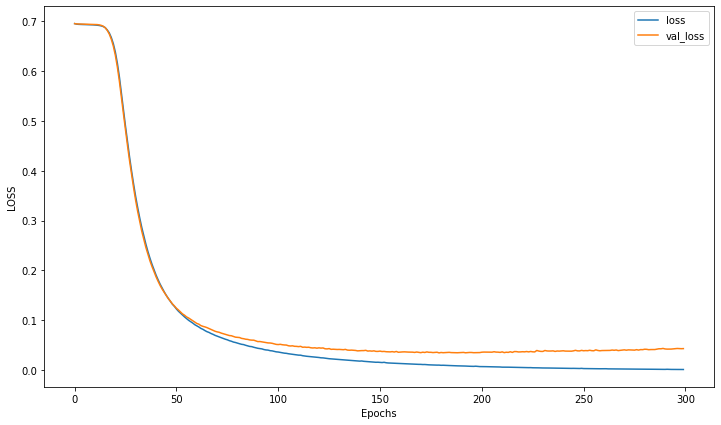

In [29]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

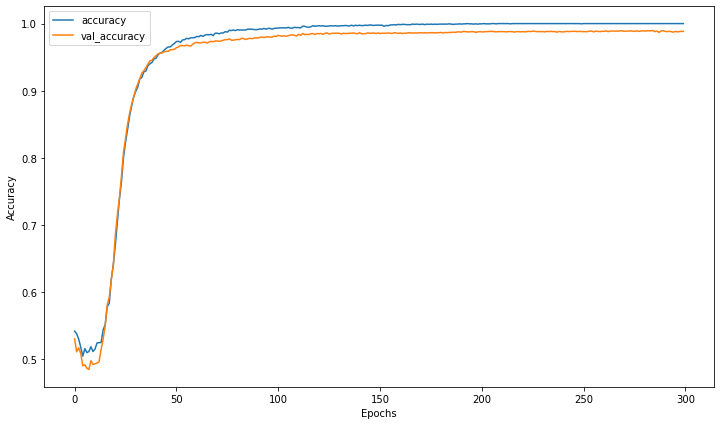

In [31]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Till here RNN, GRU, & LSTM all perform well, now, lets generate some complex sequence***

In [32]:
Sequence_Length = 9
data = []
labels = []

for i in range(5000):
    temp = np.random.randn(Sequence_Length)
    data.append(temp)
    
    # Using the first 3 elements of the sequence for the category prediction which is difficult!
    labels.append(returnLabels(temp, 0, 1, 2))
    
data, labels = np.array(data), np.array(labels)

## Generating AR Model

In [ ]:
inputShape = Input(shape = (Sequence_Length, ))
LayerStack = Dense(1, activation = "sigmoid")(inputShape)

ARModel = Model(inputShape, LayerStack)
ARModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
ARModel.summary()

trainedModel = ARModel.fit(data, labels, epochs = 300, validation_split = 0.5)

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating SimpleRNN

In [ ]:
# Resizing the Dataset to 3D for the RNN, LSTM, & GRU Working
data = np.expand_dims(data, -1)
data.shape

In [ ]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = SimpleRNN(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

RNNModel = Model(inputShape, LayerStack)
RNNModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
RNNModel.summary()

trainedModel = RNNModel.fit(data, labels, epochs = 300, validation_split = 0.5)

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating GRU

In [ ]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = GRU(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

GRUModel = Model(inputShape, LayerStack)
GRUModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
GRUModel.summary()

trainedModel = GRUModel.fit(data, labels, epochs = 300, validation_split = 0.5)

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating LSTM

In [ ]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = LSTM(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
LSTMModel.summary()

trainedModel = LSTMModel.fit(data, labels, epochs = 300, validation_split = 0.5)

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating a very long sequence!

In [ ]:
Sequence_Length = 35
data = []
labels = []

for i in range(5000):
    temp = np.random.randn(Sequence_Length)
    data.append(temp)
    
    # Using the first 3 elements of the sequence for the category prediction which is difficult!
    labels.append(returnLabels(temp, 0, 1, 2))
    
data, labels = np.array(data), np.array(labels)

## AR Model

In [ ]:
inputShape = Input(shape = (Sequence_Length, ))
LayerStack = Dense(1, activation = "sigmoid")(inputShape)

ARModel = Model(inputShape, LayerStack)
ARModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
ARModel.summary()

trainedModel = ARModel.fit(data, labels, epochs = 300, validation_split = 0.5)

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Simple RNN

In [ ]:
# Resizing the Dataset to 3D for the RNN, LSTM, & GRU Working
data = np.expand_dims(data, -1)
data.shape

In [ ]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = SimpleRNN(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

RNNModel = Model(inputShape, LayerStack)
RNNModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
RNNModel.summary()

trainedModel = RNNModel.fit(data, labels, epochs = 300, validation_split = 0.5)

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## GRU

In [ ]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = GRU(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

GRUModel = Model(inputShape, LayerStack)
GRUModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
GRUModel.summary()

trainedModel = GRUModel.fit(data, labels, epochs = 300, validation_split = 0.5)

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## LSTM